<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/sem2/1(14_10_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

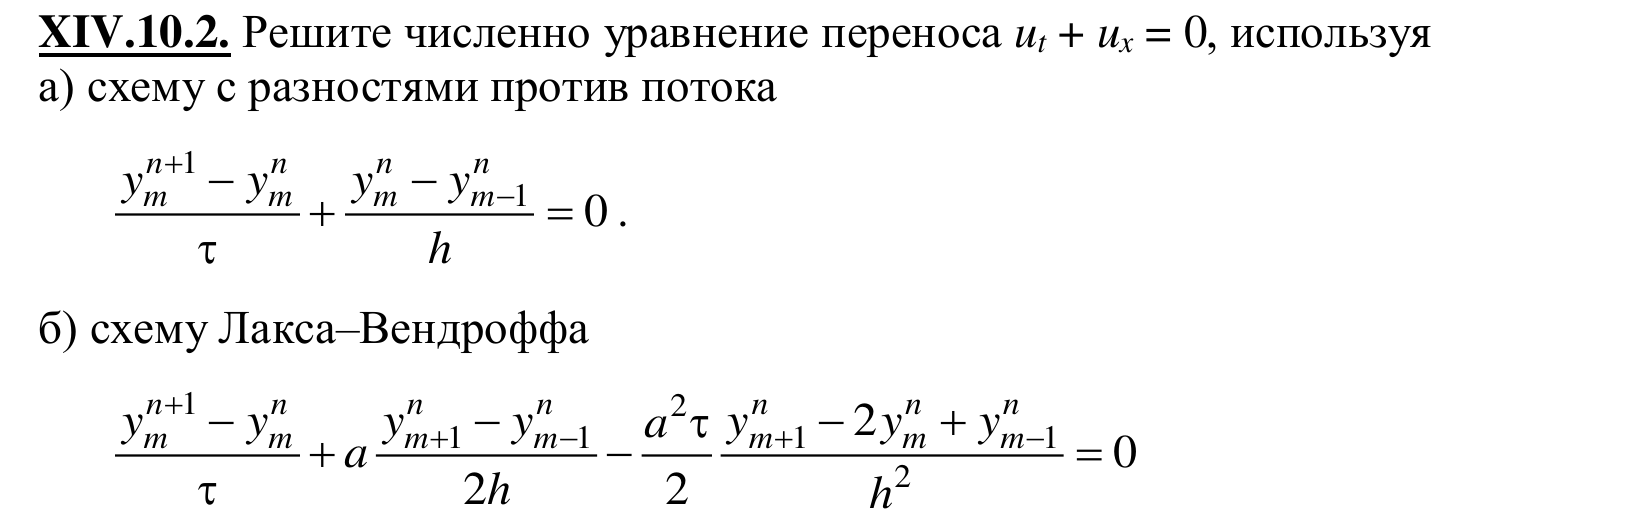

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Расчетная область: $0 \leq x \leq 20$  
Время расчета: $T=18$

In [2]:
class Grid():

    def __init__(self, CFL):
        self.L = 20
        self.T = 18
        self.h = 0.5
        self.CFL = CFL
        self.tau = self.h * CFL
        self.xr = np.arange(0, self.L + (self.h/2), self.h)
        self.tr = np.arange(0, self.T + (self.tau/2), self.tau)
        self.N = len(self.tr)
        self.M = len(self.xr)

Расчеты проводятся для сеток с $CFL = 0.6; 1; 1.01$

In [3]:
grids = [Grid(0.6), Grid(1), Grid(1.01)]

Функция для вывода результатов в моменты времени $T=0; 5; 10; 15; 18$

In [4]:
def plot(grid, u):
    fig, axs = plt.subplots(5)
    for i, t in enumerate([0, 5, 10, 15, 18]):
        axs[i].plot(grid.xr, u[int(t/grid.tau)])
        axs[i].set_title(f't={t}')
        axs[i].grid()
        axs[i].set_xlim(0, grid.L)
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
    axs[0].set_title(f'CFL={grid.CFL}\n t=0')
    fig.set_figheight(15)
    fig.set_figwidth(10)
    plt.subplots_adjust(hspace=0.6)

Начальное условие: $y(x, 0) = sin(4\pi x / L)$

In [5]:
u0 = lambda grid, x: math.sin(4*math.pi*x/grid.L)

Граничные условия: $y_{0}^{n+1}=y_{N-1}^{n+1}$

### Схема уголок

$y_m ^ {n+1} = y_m ^ {n} - \frac{\tau}{h}(y_m ^ {n} - y_{m-1} ^ {n})$

In [6]:
def corner(grid):
    u = np.zeros([grid.N, grid.M])
    u[0] = [u0(grid, x) for x in grid.xr]
    for i in range(grid.N-1):
        for j in range(1, grid.M):
            u[i+1][j] = u[i][j]-(grid.tau/grid.h)*(u[i][j]-u[i][j-1])
        u[i+1][0] = u[i+1][grid.M-1]
    return u

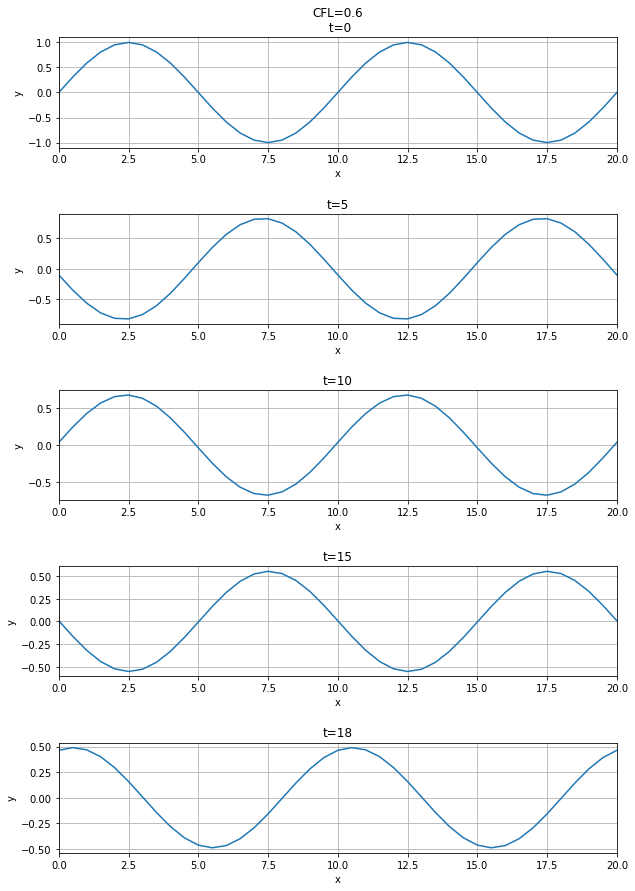

In [7]:
plot(grids[0], corner(grids[0]))

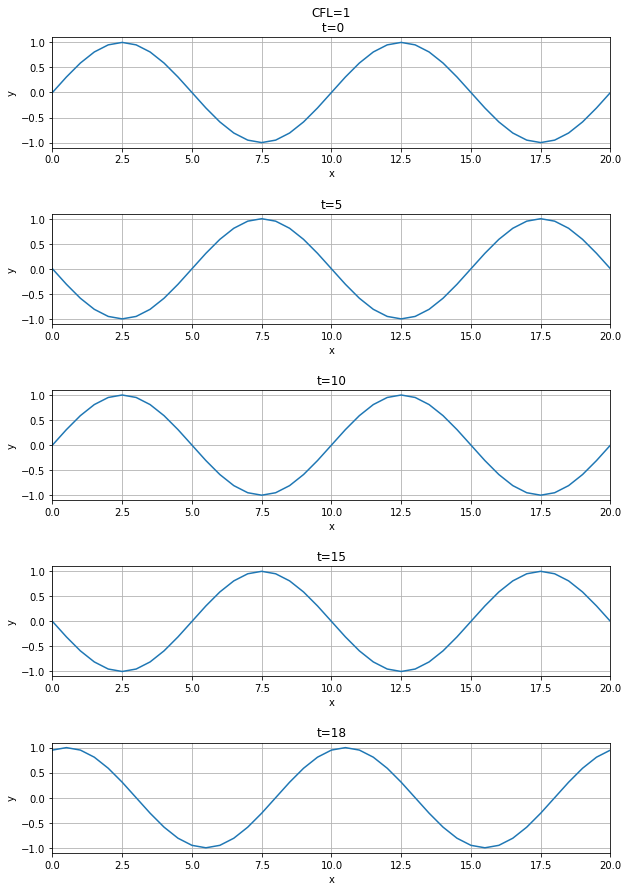

In [8]:
plot(grids[1], corner(grids[1]))

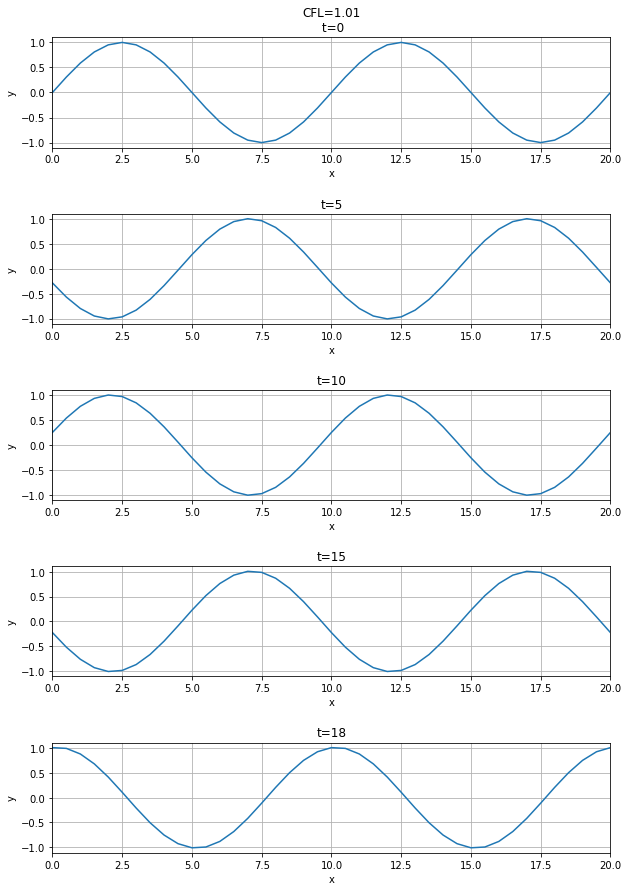

In [9]:
plot(grids[2], corner(grids[2]))

### Схема Лакса-Вендроффа

$y_{m}^{n+1} = y_{m}^{n} - \tau \big(a\frac{y_{m+1}^{n} - y_{m-1}^{n}}{2h} - \frac{a^2\tau}{2}\frac{y_{m+1}^{n} - 2y_{m}^{n} + y_{m-1}^{n}}{h^2}\big) $  
где $a=1$

In [10]:
a = 1
f = lambda grid, prev, curr, next: curr - grid.tau*( (a *(next-prev) / (2*grid.h)) - ( ((a**2) * grid.tau / 2) * (next - (2*curr) + prev)/(grid.h**2) ) )

In [11]:
def lax(grid):
    u = np.zeros([grid.N, grid.M])
    u[0] = [u0(grid, x) for x in grid.xr]
    for i in range(grid.N-1):
        u[i+1][0] = f(grid, u[i][grid.M-1], u[i][0], u[i][1])
        for j in range(1, grid.M-1):
            u[i+1][j] = f(grid, u[i][j-1], u[i][j], u[i][j+1])
        u[i+1][grid.M-1] = f(grid, u[i][grid.M-2], u[i][grid.M-1], u[i][0])
    return u

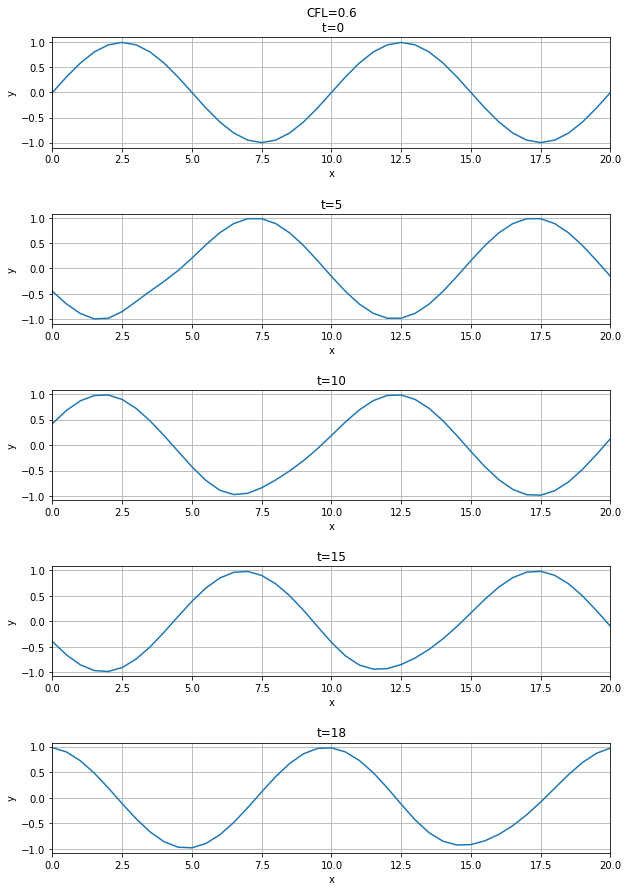

In [12]:
plot(grids[0], lax(grids[0]))

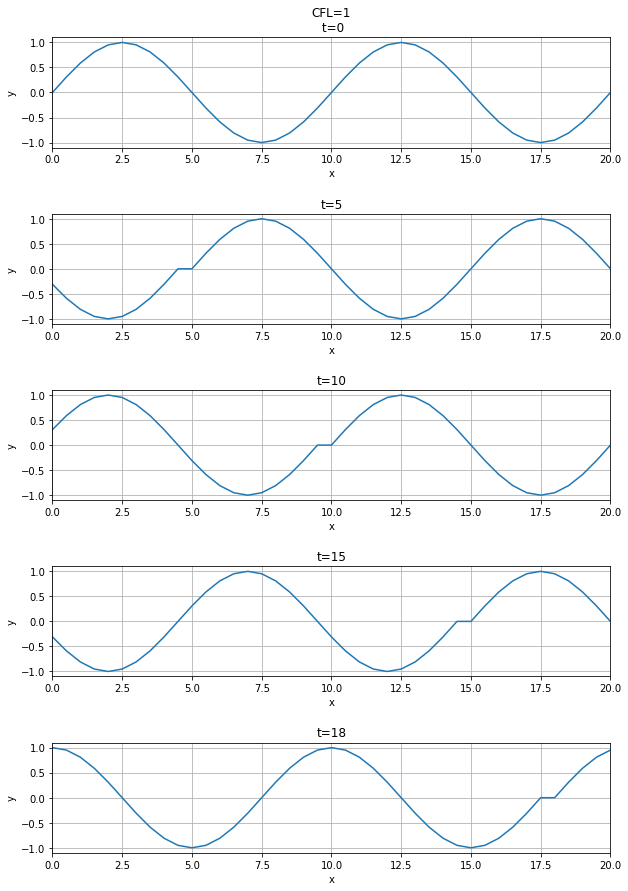

In [13]:
plot(grids[1], lax(grids[1]))

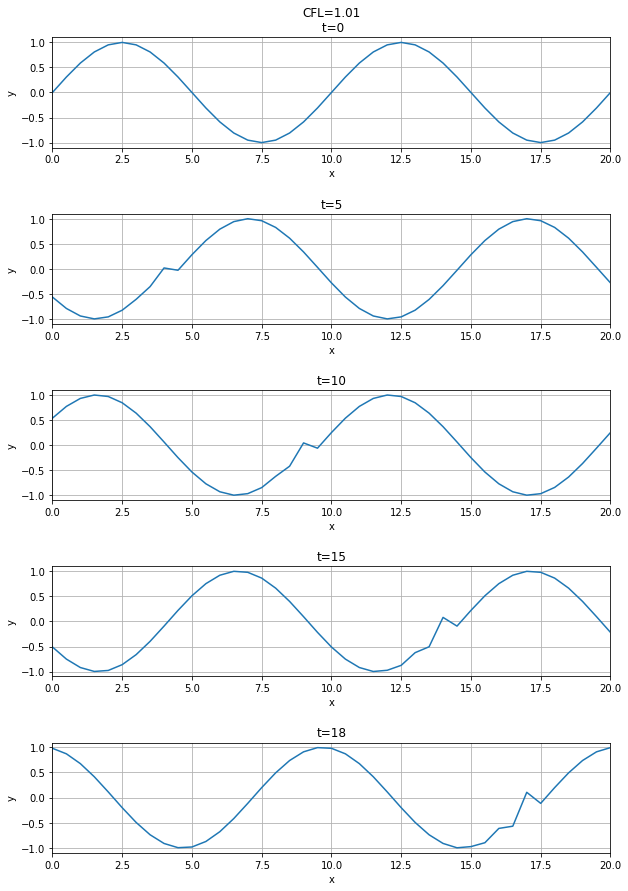

In [14]:
plot(grids[2], lax(grids[2]))

Метод устойчив при $|CFL|\leq1$